<a href="https://colab.research.google.com/github/PedroHenriqueGoncalves/compressed_sensingA01/blob/main/Compressed_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Two-Dimensional Transforms and Image Processing


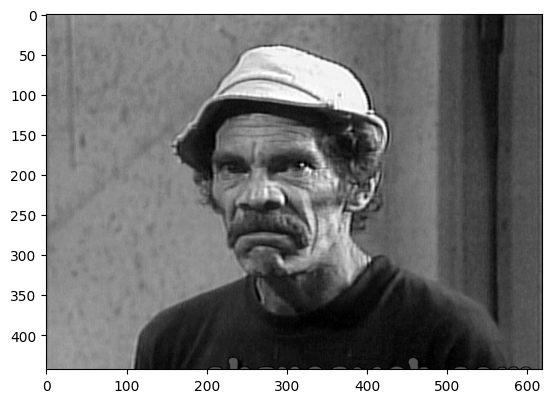

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import random
A = imread(os.path.join('...','DATA','/content/seu-madruga_chaves-2.jpg'))
x = np.mean(A,-1)
img = plt.imshow(x,cmap='gray')
# img = plt.imshow(x)

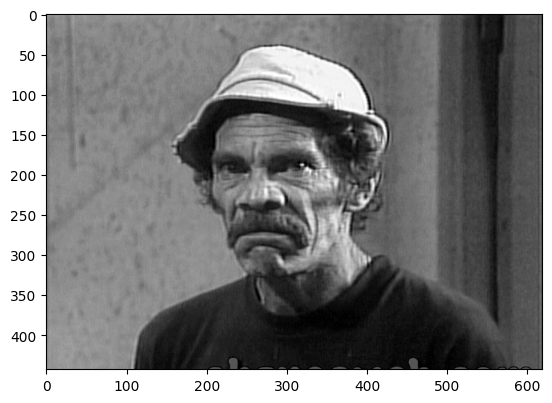

In [ ]:
fhat = np.fft.fft2(x)# 2D FFT
f = np.fft.ifft2(fhat) # 2D Inverse FFT
img = plt.imshow(np.abs(f),cmap='gray')

<ipython-input-74-ae586d69251d>:3: RuntimeWarning: divide by zero encountered in log
  ps = 0.01*np.log(np.abs(fhat))


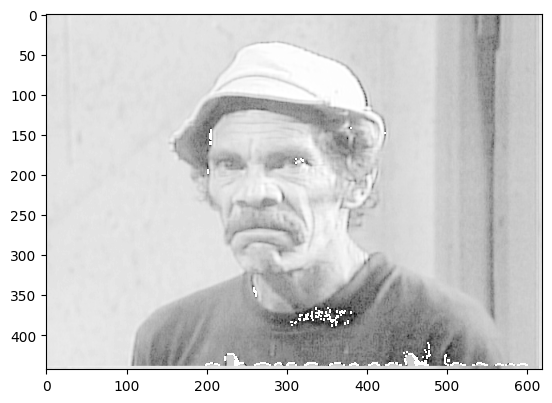

In [ ]:
import numpy.fft as fft
fhat = fft.fftshift(fhat)
ps = 0.01*np.log(np.abs(fhat))
img = plt.imshow(ps,cmap='gray')


##Image compression via the FFT.

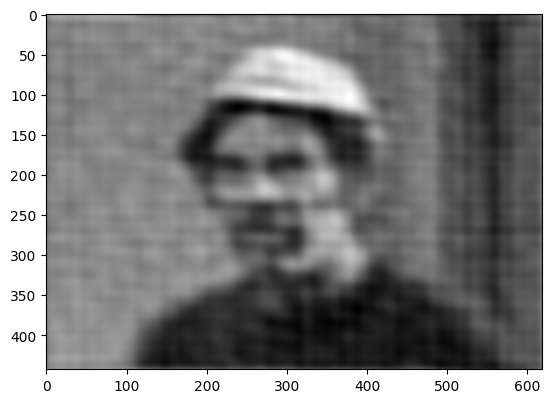

In [ ]:

Bt = np.fft.fft2(x)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude
# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
  thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
  ind = np.abs(Bt)>thresh # Find small indices
  Atlow = Bt * ind # Threshold small indices
  Alow = np.fft.ifft2(Atlow).real # Compressed image
  plt.imshow(Alow,cmap='gray')

##Image de-noising via the FFT.

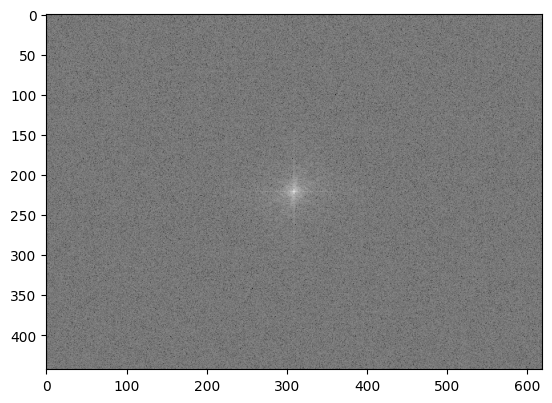

In [ ]:
B=x
Bnoise = B + 200*np.random.randn(*B.shape).astype('uint8')
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Put FFT on log scale

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')


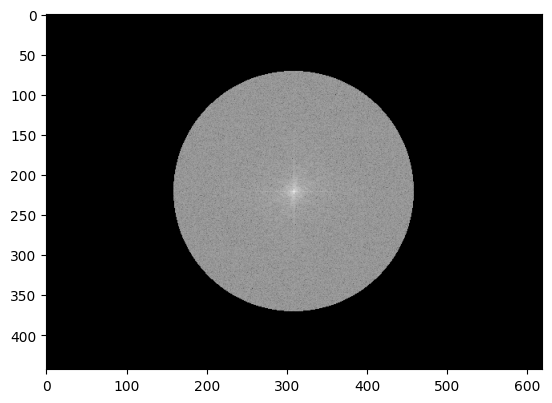

In [ ]:
plt.imshow(Ffilt,cmap='gray')

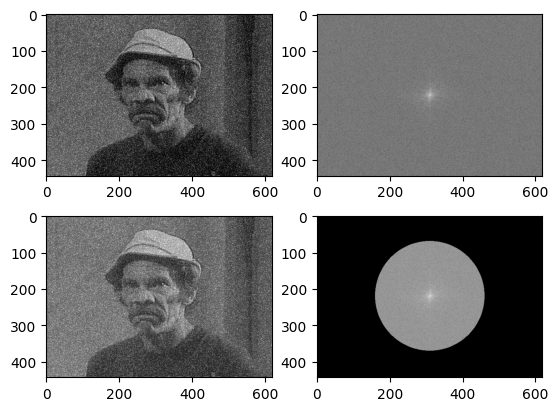

In [ ]:
semruido = np.fft.ifft2(np.fft.ifftshift(Btshiftfilt)).real

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(Bnoise,cmap='gray')
axs[0,1].imshow(F, cmap='gray')
axs[1,0].imshow(semruido, cmap='gray')
axs[1,1].imshow(Ffilt, cmap='gray')
plt.show()

##Example of a two-level wavelet decomposition.

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00


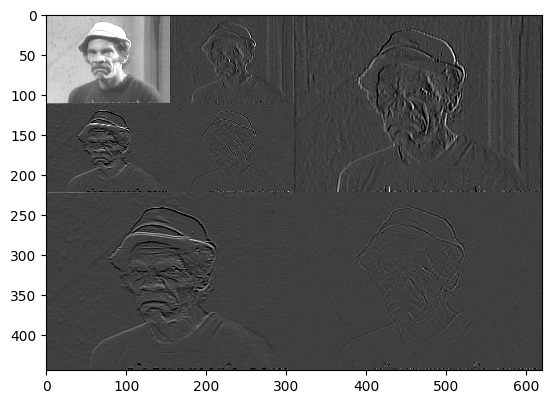

In [ ]:
import pywt
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)
# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()

for detail_level in range(n):
  coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]
  arr, coeff_slices = pywt.coeffs_to_array(coeffs)
  plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
  # plt.show(arr,cmap='gray')

##Wavelet decomposition for image compression.

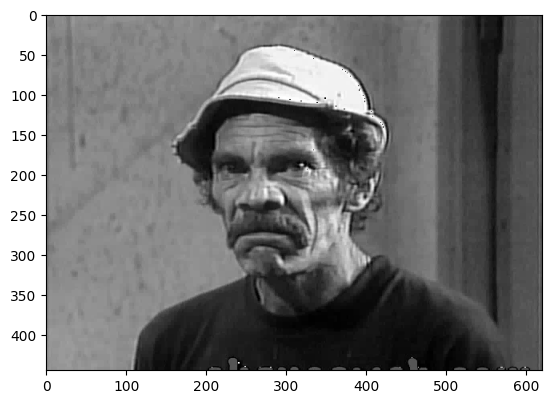

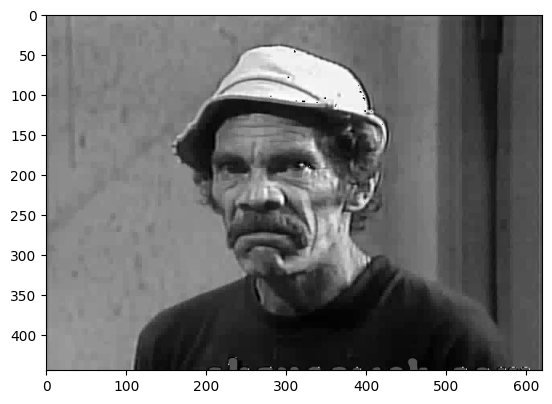

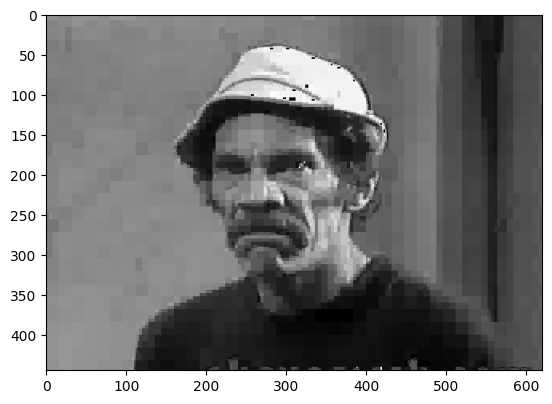

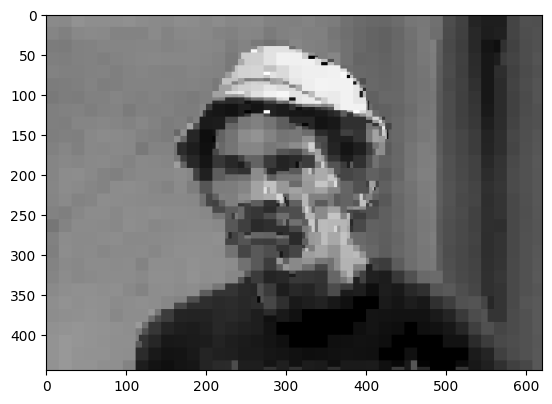

In [ ]:
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
for keep in (0.1, 0.05, 0.01, 0.005):
  thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
  ind = np.abs(coeff_arr) > thresh
  Cfilt = coeff_arr * ind # Threshold small indices
  coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,
  output_format='wavedec2')
  # Plot reconstruction
  Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
  plt.imshow(Arecon.astype('uint8'),cmap='gray')
  plt.show()